## Import libraries

In [18]:
import sys
%pwd

'/home/dliu64/Dongyi-Oral-Qual/notebooks'

In [2]:
from pathlib import Path
import numpy as np

from matplotlib import pyplot as plt
import awkward as ak
import dask
from hist.dask import Hist
from coffea.nanoevents import NanoEventsFactory, PHYSLITESchema, BaseSchema
from coffea.analysis_tools import PackedSelection
import mplhep
import uproot
import coffea.nanoevents
import math

PHYSLITESchema.warn_missing_crossrefs = False


$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)(\partial^\mu\phi)-\frac{1}{2}m^2\phi^2$
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu\partial_\mu-m)\psi$$
$\psi\rightarrow e^{i\alpha(x)}\psi$
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu D_\mu-m)\psi$$
$D_\mu=\partial_\mu+ieA_\mu(x)$

<font color='red'>$V(\phi)$</font>
$V(\phi)$
$$V(\phi)=\frac{1}{2}\mu^2\phi^2+\frac{\lambda}{4!}\phi^4$$
$\phi\rightarrow-\phi$
$$\phi\rightarrow v+\eta$$
$V(\eta)=-\frac{\lambda}{12}v^4+\frac{\lambda v^2}{6}\eta^2+\frac{\lambda v}{6}\eta^3+\frac{\lambda}{24}\eta^4$

## Standard Model

The formular of Standard model Lagrangian has been given on the [standard-model-mug](https://visit.cern/sites/default/files/inline-images/P1055164.JPG)
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu\partial_\mu-m)\psi$$
\begin{aligned}
\mathcal{L}=&-\frac{1}{4}F_{\mu\nu}F^{\mu\nu}\\
&+i\bar{\psi}\not D\psi\\
&+\psi_iy_{ij}\psi_j\phi+h.c.\\
&+|D_\mu\phi|^2-V(\phi)\\
\end{aligned}
[standard model explained in cms page](https://home.cern/science/physics/standard-model)

### Further reading

[Let's have a coffee with the SM](https://iopscience.iop.org/article/10.1088/1361-6552/aa5b25/pdf )

## Gauge symmetry

1. What is symmetry?

   Lagrangian is invariant under a certain transformation. Specifically, for the gauge symmetry, Lagrangian should invariant under gauge transformation.

2. What does Lagrangian for the spinor field look like?
   $$\mathcal{L}=\bar{\psi}(i\gamma^\mu\partial_\mu-m)\psi$$
3. What is gauge transformation?
   There're two types of gauge transformation:
   - Global gauge transformation $\psi\rightarrow e^{i\alpha}\psi$
     
     <img src="../slides_plots/global_gauge_transformation.png" width="200">
   - Local gauge transformation $\psi\rightarrow e^{i\alpha(x)}\psi$
     
     <img src="../slides_plots/local_gauge_transformation.png" width="200">

    Specifically, global gauge transformation means that we change the phase by the same amount *everywhere* in spacetime where as in local gauge transformation the phase change is dependent on spacetime. $\mathcal{L}$ is naturally invariant under the global transformation since $\mathcal{L}\rightarrow(e^{-i\alpha}\bar{\psi})(i\gamma^\mu\partial_\mu-m)(e^{i\alpha}\psi)$. However, *free* Dirac $\mathcal{L}$ is not necessarily invariant under the local transformation. So we are obliged to *add* some terms to $\mathcal{L}$.
4. How to change Lagrangian so that it can be invariant even under the local gauge transformation?
   $$\mathcal{L}=\bar{\psi}(i\gamma^\mu D_\mu-m)\psi$$
   where $D_\mu$ is **covariant derivative**, defined as $D_\mu=\partial_\mu+ieA_\mu(x)$, which can preserve L's local gauge symmetry. Because $D_\mu$ transform exactly the same as $\psi$ under the local gauge transformation $$D_\mu\psi\rightarrow e^{i\alpha(x)}D_\mu\psi$$

   So now, this 'new improved' Lagrangian is now locally invariant. The definition of $D_\mu$ introduces a new vector field $A_\mu$. However, this is not the whole story since the *full* Lagrangian must include a 'free' term for the field $A_\mu$ itself.
6. What does the full Lagrangian look like?
   $$\mathcal{L}_{QED}=-\frac{1}{4}F_{\mu\nu}F^{\mu\nu}+\bar{\psi}(i\gamma^\mu D_\mu-m)\psi$$
   where $F_{\mu\nu}=\partial_\mu A_\nu-\partial_\nu A_\mu$, the first term $-\frac{1}{4}F_{\mu\nu}F^{\mu\nu}$is the kinetic term of field $A_\mu$.
   
   Note: the new field $A_\mu$ has to be massless, otherwise the invariance will be lost. Thus, **U(1) local gauge symmetry requires the vector field $A_\mu$ to be massless, which correspond to photon as a massless gauge boson.**

   In conclusion, if we start with the Dirac Lagrangian and demand *local* phase invariance, we are forced to introduce a massless vector field $A_\mu$.

   Similarly, Lagrangian for QCD looks almost the same as the one for QED
   $$\mathcal{L}_{QCD}=-\frac{1}{4}F_{\mu\nu}^aF^{\mu\nu a}+\sum_{flavours f}\bar{\Psi}_f(i\gamma^\mu D_\mu-m_f)\Psi_f$$
   Thus, both $\mathcal{L}_{QCD}$ and $\mathcal{L}_{QED}$ are invariant under the local gauge symmetry. The corresponding massless gauge bosons are **gluons** for strong interactions and **photon** for EM interactions. But that's not the case for weak interactions since gauge bosons $W^\pm$, and $Z$ are massive. Does it mean that Lagrangian for weak interaction is not locally phase invariant? How can we explain the the massive gauge bosons for weak interaction? 

## Spontaneous Symmetry Breaking

### What causes Spontaneous Symmetry Breaking (SSB)?

When the energy minimum doesn't share the symmetry of Lagrangian, the SSB happens. The reason why 'spontaneous' is that no external agency is responsible for this symmetry breaking. For example, a thin plastic strip (or a short ruler): if you squeeze the ends together it will snap into a curved configuration, but it can just as well buckle to the left as to the right - both are ground states for the system. and either one breaks the left-right symmetry. Another great example of SSB is that when the temperature drops below the critical temperature $T_C$, the magnetic field will be all up or down to achieve the energy minimum, which is one of the most important properties of ferromagnet.

### Real scalar field $\phi$

For the real scalar field $\phi$, its Lagrangian can be expressed as follows
$$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)(\partial^\mu\phi)-\frac{1}{2}m^2\phi^2$$
where $\frac{1}{2}m^2\phi^2$ is the potential $V(\phi)$ and the coefficient in front of $\phi^2$ is the mass term.

Consider the following potential
\begin{equation}\tag{Eq 1.1}
V(\phi)=\frac{1}{2}\mu^2\phi^2+\frac{\lambda}{4!}\phi^4
\end{equation}
Apparently, Lagrangian has a discrete symmetry (Z2 symmerty) under the transformation of $\phi\rightarrow-\phi$. But the shape of potential $V(\phi)$ in terms of $\phi$ can be different with different sign of $\mu^2$. Now let's plot $V(\phi)$ with two cases of $\mu^2>0$ and $\mu^2<0$.

With $\mu^2>0$, the minimum of the potential is at the origin. With $\mu^2<0$, the potential has a W shape with two local minima at $\phi=\pm\sqrt{\frac{6}{\lambda}}|\mu|$. This constant is named vacuum expectation value (vev). The ground state has two degeneracy. In the case of $\mu^2<0$, the corresponding $\mathcal{L}$ doesn't make sense as well since the mass is imaginary. To solve this issue, we expand $V(\phi)$ at vev. $\phi=v+\eta$, where $v$ is vev, and $\eta$ is a new field. Replace $\phi$ with $\eta$ and re-express $V$ in terms of $\eta$.
\begin{equation}\tag{Eq 1.2}
V(\eta)=-\frac{\lambda}{12}v^4+\frac{\lambda v^2}{6}\eta^2+\frac{\lambda v}{6}\eta^3+\frac{\lambda}{24}\eta^4
\end{equation}
$-\frac{\lambda}{12}v^4$ is a constant, which is not important in potential (potential is a relative value not a absolute value). The second term $\frac{\lambda v^2}{6}\eta^2$ tells us that the mass of $\eta$ is $\sqrt{\frac{2\lambda v^2}{3}}$. While the last two terms are self interaction of $\eta$, corresponding to the following feynman diagrams.
<img src="../slides_plots/scalar_field_self_interaction_3legs.png" width="100"> <img src="../slides_plots/scalar_field_self_interaction_4legs.png" width="100">

Note \ref{Vphi} represents exactly the same physical system as \ref{Veta} does. Both equations describe same potential, just from different perspectives. The physical meaning of expanding the potential at vev is that the field spontaneously pick one of the ground states, and thus breaking the symmetry, since $V(\phi)$ isn't invariant under the transformation of $\eta\rightarrow-\eta$.

**Conclusion**:
This is the standard procedure of spontaneous symmetry breaking. First, locate the ground state (the field configuration for which $V(\phi)$ is a minimum) and re-express $V$ as a function of the $\eta$ and get the corresponding mass term and related self interaction terms.

What's the requirement of SSB? the 'vacuum' doesn't share the symmetry of the Lagrangian.

#### W-shape potential plots


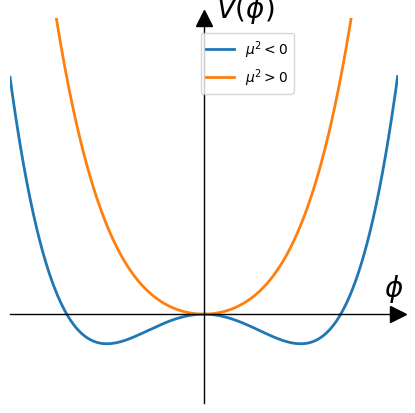

In [38]:
x = np.arange(-3, 3, .001)
mu2 = 4
lamda=24
vev = 6*mu2/lamda
V_min = -3*mu2**2/2/lamda
y_pos = mu2/2 * x**2 + lamda/math.factorial(4) * x**4
y_neg = -mu2/2 * x**2 + lamda/math.factorial(4) * x**4
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, y_neg, label=r'$\mu^2<0$', linewidth=2)
ax.plot(x, y_pos, label=r'$\mu^2>0$', linewidth=2)
#ax.scatter([np.sqrt(vev),-np.sqrt(vev)], [V_min,V_min], marker='o', s=500, color='red')
ax.set_ylim(-3,10)
ax.set_xlim(-2, 2)

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_linewidth(1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

# Draw arrows
arrow_fmt = dict(markersize=12, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(r'$\phi$', size=20, labelpad=-30, x=.99)
ax.set_ylabel(r'$V(\phi)$', size=20, labelpad=-30, y=.98, rotation=0)

# Get rid of ticks
ax.set_yticks([])
ax.set_xticks([])

ax.legend(bbox_to_anchor=(.75, .98))
#plt.savefig('../slides_plots/SSB_real_scalar_field.jpg')

plt.show()

### Complex scalar field $\phi$

For a complex scalar field $\phi$, the Lagrangian is
$$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)^*(\partial^\mu\phi)-\frac{1}{2}m^2|\phi|^2$$
$$V(\phi)=\frac{1}{2}\mu^2\phi^*\phi+\frac{\lambda}{4!}(\phi^*\phi)^2$$


### Further Reading

- [Introduction to SSB](https://arxiv.org/pdf/1909.01820)
- [what's the connection between SSB and ground state degeneracy](https://physics.stackexchange.com/questions/822590/spontaneous-symmetry-breaking-versus-degenerate-excitations-in-gapless-quantum-s)
- [time-reversal symmetry](https://physics.stackexchange.com/questions/131161/spontaneous-symmetry-breaking-and-time-reversal-symmetry)

## Higgs Mechanism

A *massless* vector field carries 2 degrees of freedom (transverse polarizations). When $A_\mu$ acquired mass, it picks up a third (longitudinal polarization). The extra degree of freedom comes from the Goldstone boson. The massless gauge field 'ate' the Goldstone boson to become massive. This is the famous Higgs mechanism, combine local gauge invariance and spontaneous symmetry breaking together.

### Further reading

[Higgs Mechanism](https://www.theorie.physik.uni-muenchen.de/lsfrey/teaching/archiv/sose_09/rng/higgs_mechanism.pdf)